# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [3]:
# Importing all of my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
# Making the dataframe
diabetes = pd.read_csv('Dataset of Diabetes .csv')

In [5]:
# Snapshot of diabetes dataframe
diabetes.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


Diabetes column definitions:

ID: Patient ID Number

No_Pation: Patient Number

Gender: Female or male

AGE: Age of patient

Urea: Blood urea levels

Cr: Creatinine ratio

HbA1c: HbA1c level

Chol: Cholesterol

TG: Triglycerides (fasting)

HDL: HDL level (fasting)

LDL: LDL level (fasting)

VLDL: VLDL level (fasting)

BMI: Body Mass Index

CLASS: patient's diabetes disease class; N=Non-Diabetic, Y=Diabetic, P=Pre-Diabetic

In [24]:
diabetes.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [9]:
diabetes.shape

(1000, 14)

In [6]:
# Getting data types for the dataframe
print(diabetes.info())

# Diabetes are a mixture of integers, floats, and strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
None


In [25]:
diabetes.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [8]:
# Looking at unique values in each column to see if I can get rid of any that are all the same
diabetes.nunique()

# Looks like all the information is mostly unique for all dataframes. 
# No column in any dataframe as a value of 1, and the ones that have a 2 are yes/no.
# There are 3 genders though, probably mistyped at some point
# There should only be 3 classes, probably another typo to fix
# 1000 entries, but only 800 ID numbers

ID           800
No_Pation    961
Gender         3
AGE           50
Urea         110
Cr           113
HbA1c        111
Chol          77
TG            69
HDL           48
LDL           65
VLDL          60
BMI           64
CLASS          5
dtype: int64

In [10]:
# Looking for null values in each column for each dataframe
diabetes.isnull().sum()

# The diabetes dataframe is clean of null values

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [16]:
# Look for duplicate data in each dataframe
diabetes.duplicated().sum()

# There are no duplicates in the dataframe
# This is weird because the shape says there are 1000 entries, but no null values or duplicates. Fishy

0

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322


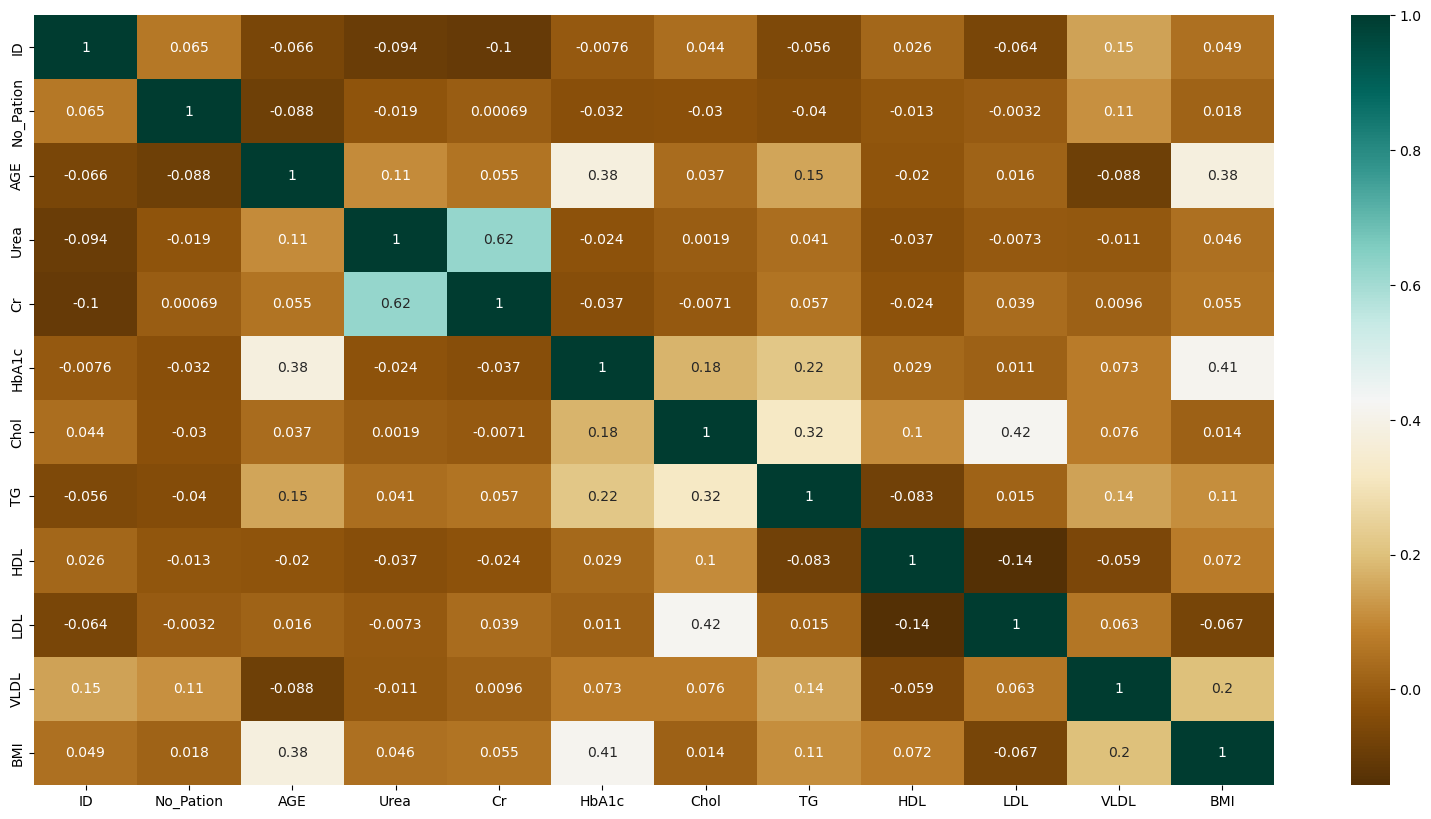

In [12]:
plt.figure(figsize=(20,10))
c=diabetes.corr()
sb.heatmap(c,cmap="BrBG",annot=True)
c

# Looks to be slight correlation between diabetes and general health and HighBP
# Also looks like there is low correlation between diabetes and physical activity, which makes sense
# Surprisingly, BMI does not correlate as much with diabetes as I would have thought.

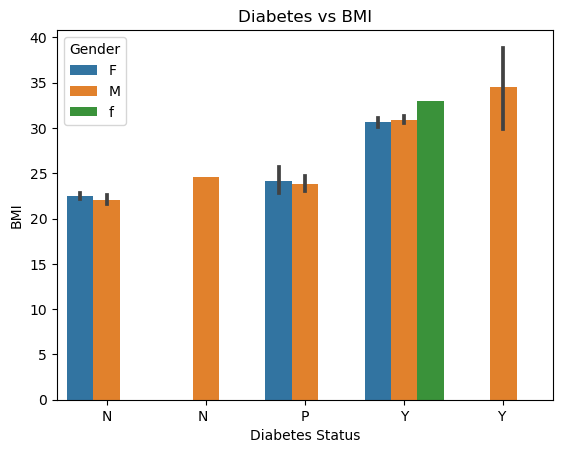

In [15]:
sb.barplot(x='CLASS', y='BMI', hue='Gender', data=diabetes)
plt.title('Diabetes vs BMI')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

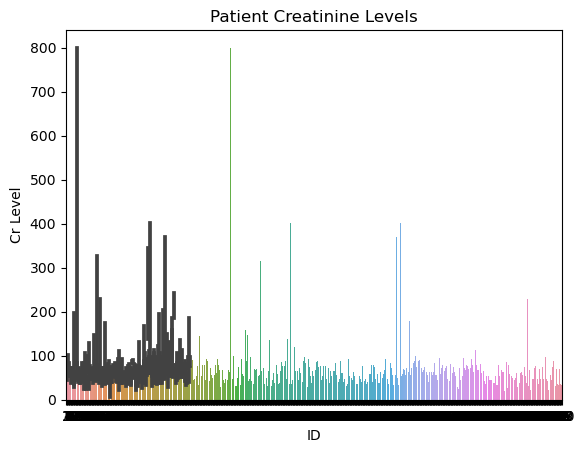

In [17]:
sb.barplot(x='ID', y='Cr', data=diabetes)
plt.title('Patient Creatinine Levels')
plt.xlabel('ID')
plt.ylabel('Cr Level')
plt.show()

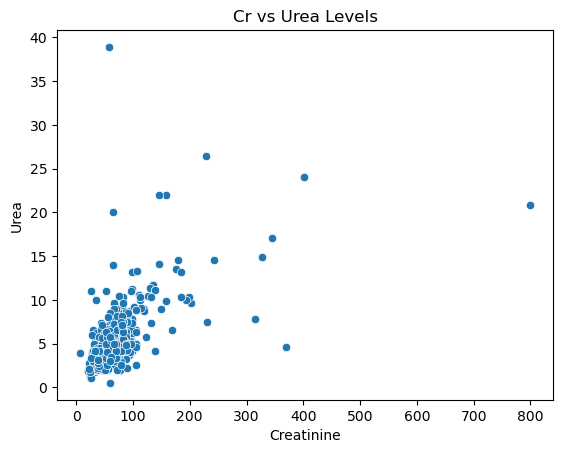

In [18]:
sb.scatterplot(x='Cr', y='Urea', data=diabetes)
plt.title('Cr vs Urea Levels')
plt.xlabel('Creatinine')
plt.ylabel('Urea')
plt.show()

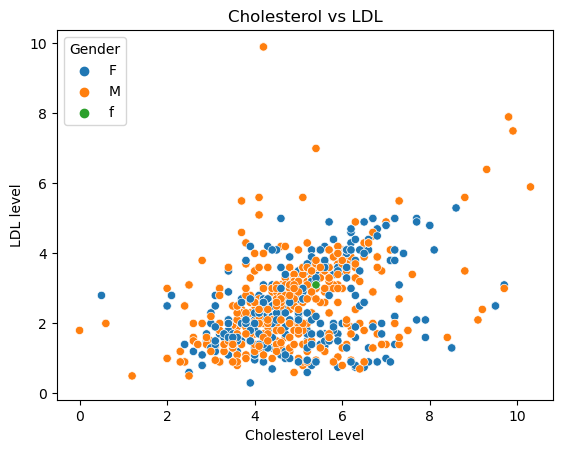

In [19]:
sb.scatterplot(x='Chol', y='LDL', hue='Gender', data=diabetes)
plt.title('Cholesterol vs LDL')
plt.xlabel('Cholesterol Level')
plt.ylabel('LDL level')
plt.show()

<AxesSubplot:>

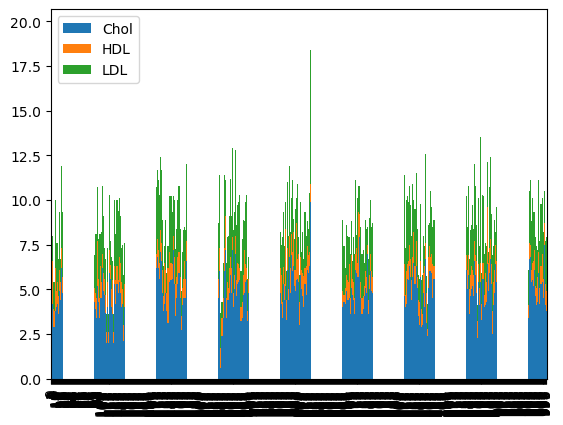

In [20]:
diabetes_bar = diabetes[['Chol', 'HDL', 'LDL']]
diabetes_bar
diabetes_bar.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='CLASS', ylabel='HbA1c'>

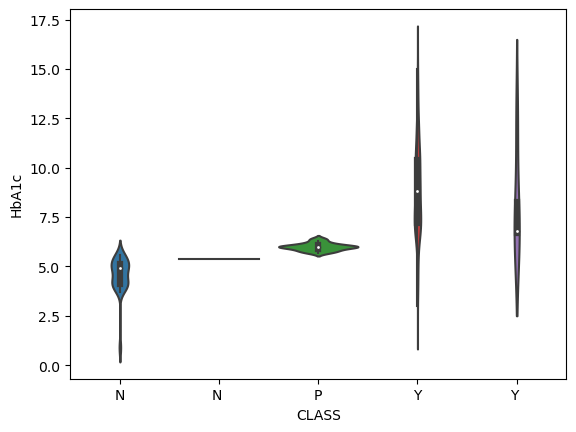

In [21]:
sb.violinplot(y=diabetes['HbA1c'], x=diabetes['CLASS'])

<AxesSubplot:xlabel='AGE', ylabel='BMI'>

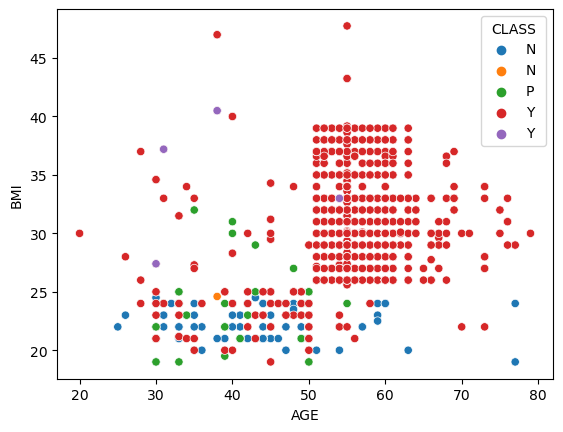

In [22]:
sb.scatterplot(x='AGE', y='BMI', hue='CLASS', data=diabetes)

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

1. Nothing in the data was too surprising. I was interested to see such a strong relationship between Age and BMI.
2. There are 1000 entries in the dataset, and yet only 800 unique IDs, but no duplicate values or null values. There are also 3 genders and extra class types, which I am attributing to typographical errors that I will have to fix.
3. I need to figure out what's going on with the number of entries. I will need to fix the extra genders and class types. There are also some outliers that I may have to deal with eventually in the LDL and Cr columns.